# Lego Sales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/domenicocangemi/Desktop/Data/Python/lego-analysis-master/datasets/lego_sets.csv')

In [4]:
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [33]:
dg = pd.read_csv('/Users/domenicocangemi/Desktop/Data/Python/lego-analysis-master/datasets/parent_themes.csv')

### Domanda 1: Che percentuale di collezioni con licenza è a tema Star Wars?

In [43]:
merge = df.merge(dg, how='left', left_on='parent_theme', right_on='name')

In [48]:
merge = merge.drop(['name_y','id'],axis=1)

In [58]:
merge.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,False


In [59]:
licensed = merge[merge['is_licensed']]

In [64]:
licensed = licensed[licensed['set_num'].notnull()]

In [72]:
total_licensed = len(licensed)

In [91]:
starwars_licensed = len(licensed[licensed['parent_theme'] == 'Star Wars'])

In [93]:
the_force = round((starwars_licensed*100)/total_licensed)

In [97]:
print(str(the_force) + '% of licensed sets are Star Wars themed')

52% of licensed sets are Star Wars themed


### Domanda 2: In che anno Star Wars non è stato il tema più popolare tra le collezioni rilasciate?


In [156]:
per_year = licensed.groupby(['year', 'parent_theme'], as_index=False)['set_num'].count()

In [157]:
per_year = per_year.sort_values(['year','set_num'], ascending=[True, False])

In [158]:
per_year['rank'] = per_year.groupby('year')['set_num'].rank(ascending=False)

In [163]:
most_popular = per_year[per_year['rank'] == 1.0]

In [167]:
most_popular.drop(['set_num','rank'],axis=1,inplace=True)

/var/folders/dt/xjxw5sfs46vf81751tfk_4bw0000gn/T/ipykernel_43233/871880178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_popular.drop(['set_num','rank'],axis=1,inplace=True)


In [171]:
most_popular.rename(columns={'parent_theme' : 'most_popular'},inplace=True)

/var/folders/dt/xjxw5sfs46vf81751tfk_4bw0000gn/T/ipykernel_43233/3382069620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_popular.rename(columns={'parent_theme' : 'most_popular'},inplace=True)


In [186]:
most_popular.reset_index(drop=True,inplace=True)

In [188]:
most_popular

,year,most_popular
0,1999,Star Wars
1,2000,Star Wars
2,2001,Star Wars
3,2002,Star Wars
4,2003,Star Wars
5,2004,Star Wars
6,2005,Star Wars
7,2006,Star Wars
8,2007,Star Wars
9,2008,Star Wars


In [189]:
new_eras = []
for i in range(0,len(most_popular)):
    if most_popular.loc[i]['most_popular'] != 'Star Wars':
        new_eras.append(most_popular.loc[i]['year'])

In [190]:
new_eras

[2017]

### Domanda 3: In che anno sono stati prodotti più set?

In [191]:
df.head(10)

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
5,0014-1,Space Mini-Figures,1979,12.0,Supplemental,Space
6,0015-1,Space Mini-Figures,1979,NaN,Supplemental,Space
7,0016-1,Castle Mini Figures,1978,NaN,Castle,Castle
8,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland
9,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland


In [194]:
df = df[df['set_num'].notnull()]

In [206]:
year_prod = df.groupby('year')['set_num'].count().reset_index()
year_prod

,year,set_num
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12
...,...,...
61,2013,593
62,2014,715
63,2015,670
64,2016,608


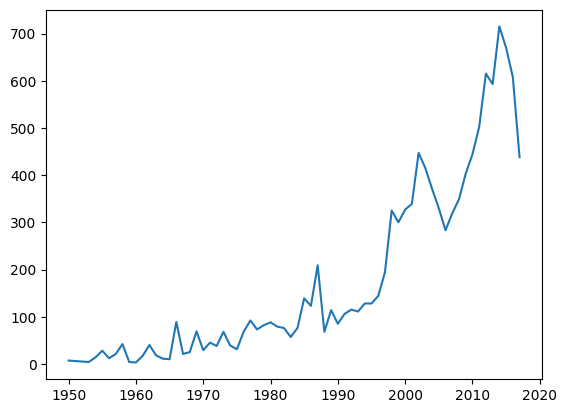

In [208]:
plt.plot(year_prod['year'],year_prod['set_num'])
plt.show()